In [1]:
import pandas as pd
import numpy as np

#  Allstate Claims Severity Prediction Project




##**Carga de los Datos**

In [14]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload() # Please follow the repository instructions to join the competition and load your account kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"giovanicardona","key":"69381ff6804d8033c6dcc4bccda94484"}'}

In [3]:
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c allstate-claims-severity

 94% 46.0M/48.8M [00:03<00:00, 19.9MB/s]
100% 48.8M/48.8M [00:03<00:00, 15.7MB/s]


In [4]:
!mkdir -p kaggle/
!unzip allstate-claims-severity.zip -d kaggle/

Archive:  allstate-claims-severity.zip
  inflating: kaggle/sample_submission.csv  
  inflating: kaggle/sample_submission.csv.zip  
  inflating: kaggle/test.csv         
  inflating: kaggle/test.csv.zip     
  inflating: kaggle/train.csv        
  inflating: kaggle/train.csv.zip    


## **Preprocesar Archivo de Datos**

In [3]:
loss_amount_train = pd.read_csv('kaggle/train.csv', low_memory=True)
loss_amount_train.set_index("id", inplace = True)
loss_amount_train.info()

loss_amount_test = pd.read_csv('kaggle/test.csv', low_memory=True)
loss_amount_test.set_index("id", inplace = True)
loss_amount_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 1 to 587633
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 189.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125546 entries, 4 to 587634
Columns: 130 entries, cat1 to cont14
dtypes: float64(14), object(116)
memory usage: 125.5+ MB


### Processing missing data

Choosing 3 random columns to set 5% of total rows to NaN, simulating missing data.

In [4]:
df_tr = loss_amount_train.copy()
#df_tr.head()

empties_qty = int(np.ceil(len(df_tr) * 0.05))

# Obtener 3 columnas numéricas para simular datos faltantes
cols_nan = df_tr.iloc[:,-15:-1].sample(n=3,axis='columns').columns

for column in cols_nan:
    print(column)
    print('Max: ' + str(max(df_tr.loc[:,column])))
    print('Min: ' + str(min(df_tr.loc[:,column])))
    print('Mean: ' + str(np.mean(df_tr.loc[:,column])))
    print('')

    nan_rows = df_tr.sample(n=empties_qty)
    nan_rows[column] = np.nan
    df_tr.loc[df_tr.index.isin(nan_rows.index),column] = nan_rows[column]

cont9
Max: 0.9954
Min: 8e-05
Mean: 0.48550631989507115

cont10
Max: 0.99498
Min: 0.0
Mean: 0.4980658504232204

cont8
Max: 0.9802
Min: 0.23688
Mean: 0.4864373158699647



Fill NaN values with the column mean

In [5]:
for col in cols_nan:
    mean = np.mean(df_tr[col])
    df_tr[col].fillna(mean, inplace=True)

df_tr.isnull().values.any() # Validate NaN Data

False

## Analizing data

Analyze the columns correlation

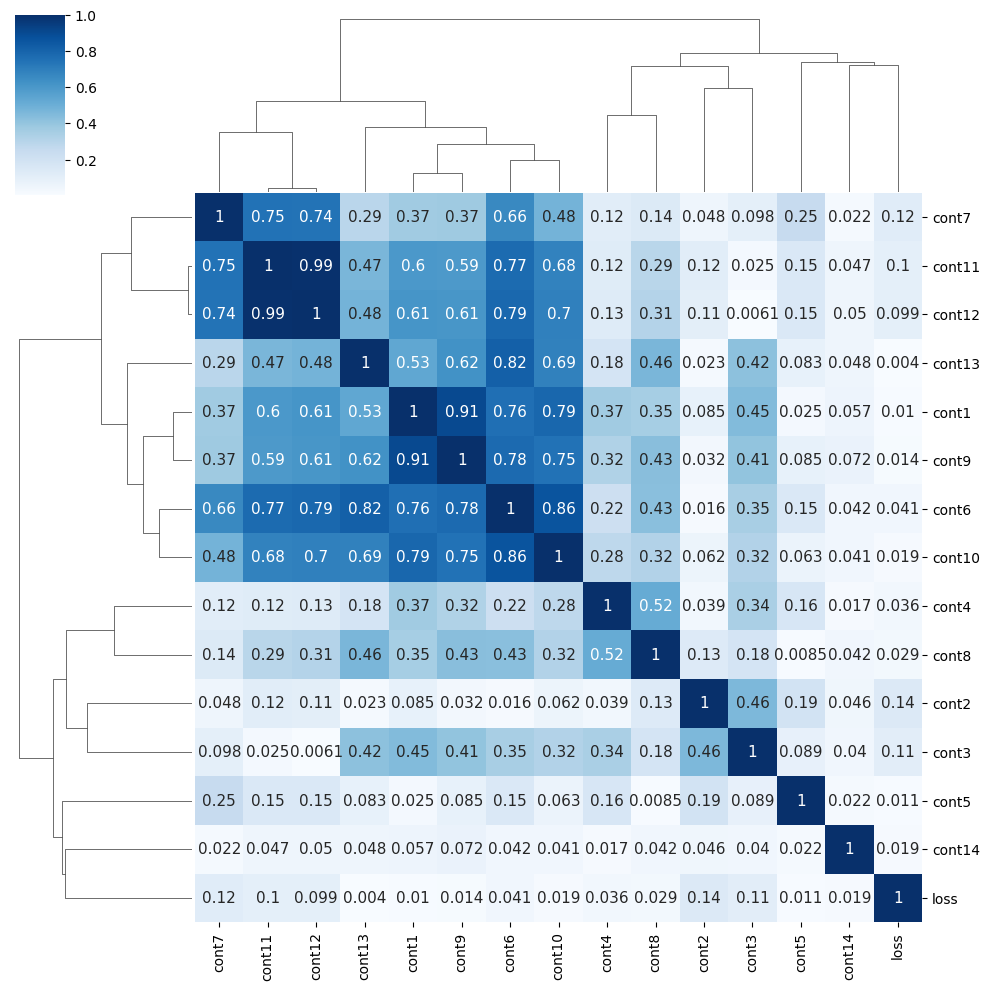

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df_tr.iloc[:,-15:].corr().abs()
map = sns.clustermap(df_corr, annot = True, annot_kws = {'size': 11}, cmap = 'Blues')
map

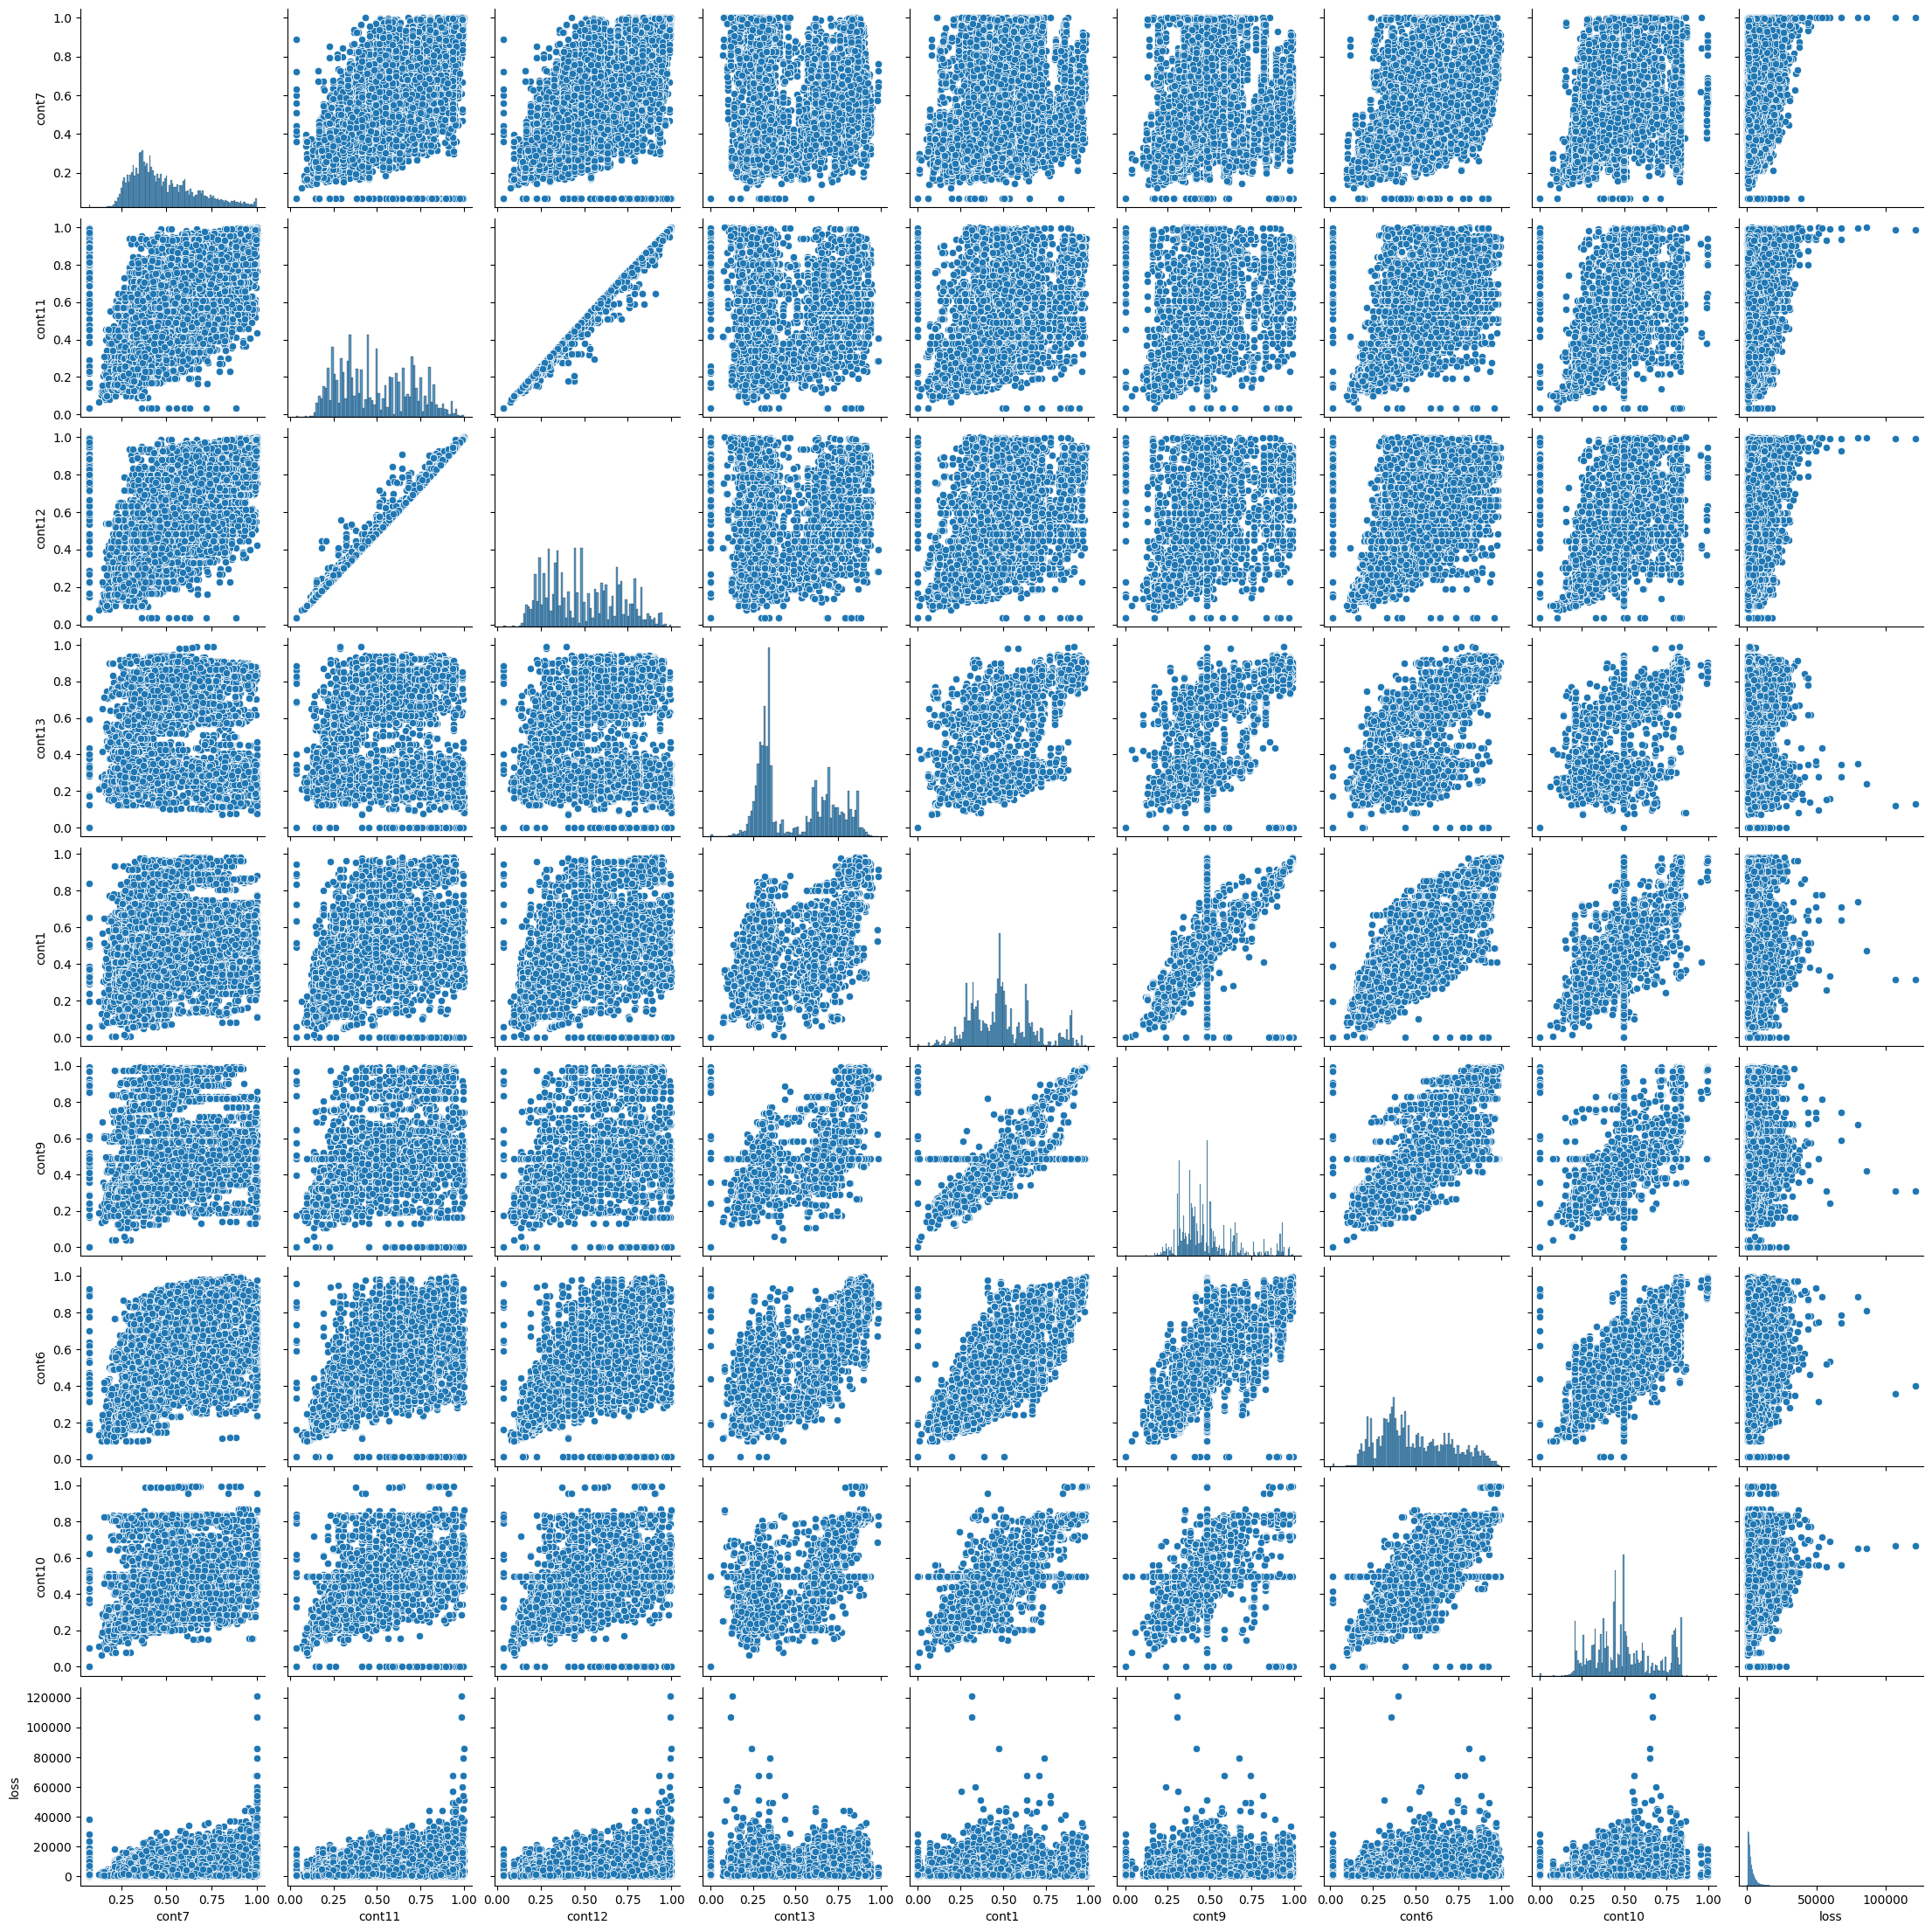

In [7]:
sns.pairplot(df_tr, vars=["cont7", "cont11", "cont12", "cont13", "cont1", "cont9", "cont6", "cont10", "loss"])
plt.show()

In [8]:
X = df_tr.iloc[:, :-1]
y = df_tr.iloc[:, -1]

Categorical Columns Data Transformation

In [9]:
df_tr.shape

(188318, 131)

In [10]:
import regex as re
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_pattern = re.compile('^cat(\d{1,3})$')
cat_cols = [col for col in df_tr.columns if cat_pattern.match(col)]
print(cat_cols)

cat_cols_index = [df_tr.columns.tolist().index(cat_col) for cat_col in cat_cols]
print(cat_cols_index)

counts = X.select_dtypes(include='object').nunique().sum()
print(counts)
cols_name = range(0, int(counts))

print(cols_name)

numeric_df = X.select_dtypes(include='float')
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

ct = ColumnTransformer(transformers=[(col, OneHotEncoder(), cat_cols_index)], remainder='drop')
cat_arr = ct.fit_transform(X).todense()


['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111

In [11]:
cat_df = pd.DataFrame(cat_arr, columns=cols_name)
X = pd.merge(left=cat_df, right=numeric_df, left_index=True, right_index=True, how='outer')

In [12]:
y = np.log(y)

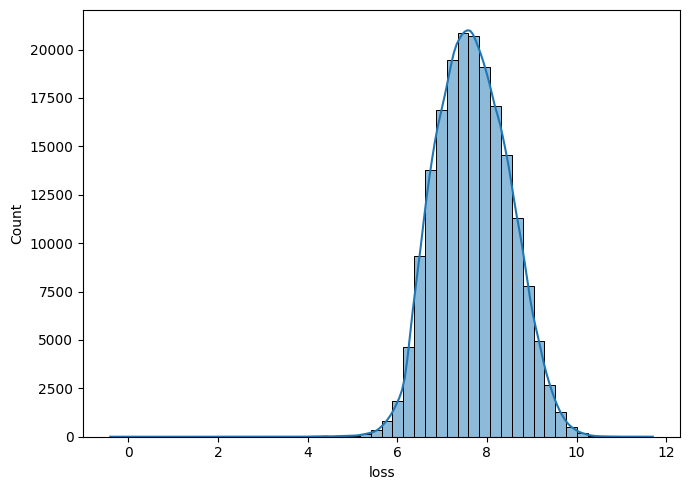

In [13]:
plt.figure(figsize=(7, 5))
sns.histplot(data=y, kde=True, bins=50)
plt.tight_layout()